In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import numpy as np
from cvzone.HandTrackingModule import HandDetector


In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
     #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def style_of_landmarks(image, results):
    # draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
    #                         mp_drawing.DrawingSpec(color=(80,50,10), thickness=1,circle_radius=1),
    #                       mp_drawing.DrawingSpec(color=(80,50,10),thickness=1, circle_radius=1))
     # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
     # draw left connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
     # draw right connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
    
    

In [6]:
mp_holistic.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [7]:
# define a video capture object
vid = cv2.VideoCapture(0)
detector = HandDetector(maxHands=2)
with mp_holistic.Holistic(min_detection_confidence =0.5, min_tracking_confidence=0.5) as holistic:
    while vid.isOpened():
        
        # Capture the video frame
        # by frame
        ret, frame = vid.read()
        hands, frame = detector.findHands(frame)
        # make detection
        image, results = detection(frame, holistic)
        
        # draw landmarks
        style_of_landmarks(image, results)

        # Display the resulting frame
        cv2.imshow('frame', image)
        
        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

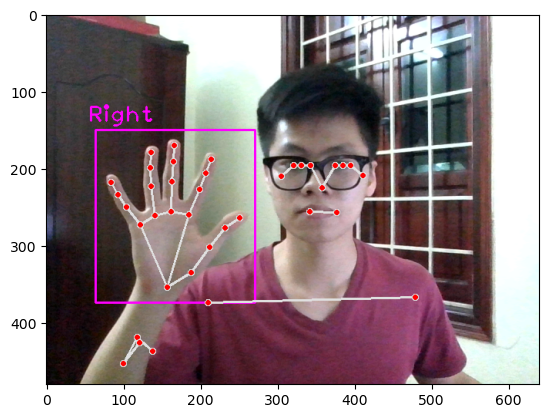

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [11]:
results.pose_landmarks.landmark[0].x

0.5605119466781616

In [12]:
def extract_key_points(results):
    # take all marks possitions 
    # and put into an list of array
    # these pose will help for the action detection
    poses_list = np.array([[i.x, i.y, i.z, i.visibility] for i in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    left_hand = np.array([[i.x, i.y, i.z] for i in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[i.x, i.y, i.z] for i in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([poses_list, left_hand, right_hand])

In [13]:
result_test = extract_key_points(results)

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')

array([ 5.60511947e-01,  4.70343232e-01, -8.23125005e-01,  9.99974906e-01,
        5.86552799e-01,  4.08646017e-01, -7.58500278e-01,  9.99951839e-01,
        6.02598310e-01,  4.08520609e-01, -7.58415341e-01,  9.99947429e-01,
        6.18371189e-01,  4.09237295e-01, -7.58418918e-01,  9.99935746e-01,
        5.36737084e-01,  4.09829259e-01, -7.69788265e-01,  9.99963522e-01,
        5.18228173e-01,  4.09643561e-01, -7.69270539e-01,  9.99968946e-01,
        5.01656532e-01,  4.09025520e-01, -7.69369483e-01,  9.99969542e-01,
        6.42597139e-01,  4.36069757e-01, -3.52094412e-01,  9.99935985e-01,
        4.76572752e-01,  4.37868744e-01, -4.02641207e-01,  9.99977708e-01,
        5.90394855e-01,  5.35809457e-01, -6.75484896e-01,  9.99961257e-01,
        5.35103858e-01,  5.33677399e-01, -6.89767182e-01,  9.99975502e-01,
        7.49133945e-01,  7.65410066e-01, -1.47992194e-01,  9.99088168e-01,
        3.29560220e-01,  7.80203760e-01, -2.42814392e-01,  9.99502718e-01,
        8.33556056e-01,  

In [16]:
# Setup Folders for Collection
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [17]:
# CREATE FOLDER CONTAINS TRAINNING DATA/ SAMPLE ACTION DATA
# IF WANT TO CHANGE ANOTHER DATA BUT THE FOLDER ALREADY FULL
# DELETE THE FOLDER AND RUN THIS PART OF PROGRAM AGAIN

for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [18]:
# GET TRAINNING DATA
# UNCOMMENT IF WANT TO USE THIS PART

# TRAINNING DATA WILL BE GATHERED THROUGHT PICTURES OF ACTIONS THAT RELEVANT 
# TO THE MESSAGE U WANT TO SHOW
# HAVING 3 MAIN MESSAGES: HI, THANKS, LOVE 
# THE COLLECTING PROCESS IS CONTINUOUS SO U 
# U WILL HAVE 2-3 SECONDS TO CHANGE FORM OF YOUR ACTION BEFORE GO TO THE NEXT RECORD

# NEED TO COLLECT 30 VID ~ 30 SAMPLE ACTIONS FOR EACH MESSAGE  
# --> 30 VID FOR 1 MESSAGE * 3 MESSAGE = 90 VIDS :DD

# ALL WILL BE SAVE INTO FOLDER CREATED BY ABOVE FUNCTION



vid = cv2.VideoCapture(0)
detector = HandDetector(maxHands=2)
with mp_holistic.Holistic(min_detection_confidence =0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = vid.read()

                # Make detections
                image, results = detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                style_of_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    # MODIFY THE RESTING TIME BETWEEN RECODS  
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_key_points(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

In [ ]:
vid.release()
cv2.destroyAllWindows()

In [ ]:
########## DONT USE THIS PART!!!


# from cvzone.HandTrackingModule import HandDetector
# import cv2
# import numpy as np
# import math

# cap = cv2.VideoCapture(0)
# detector = HandDetector(maxHands=2)

# offset = 20
# imgSize = 300
# while True:
#     success, img = cap.read()
#     hands,img = detector.findHands(img)
#     if hands:
#         hand  = hands[0]
#         x, y, z, h = hand["bbox"]

#         imgWhite = np.ones((imgSize, imgSize, 3), np.uint8)*255
#         imgCrop = img[y - offset:y + h-offset, x-offset:x+z-offset]

#         imgCropShape = imgCrop.shape


#         aspectRatio = h/z
#         if aspectRatio >1:
#             k = imgSize/h
#             zCal = math.ceil(x+z)
#             imageResize = cv2.resize(imgCrop,(zCal, imgSize))
#             imgResizeShape = imageResize.shape
#             zGarp = math.ceil((300-zCal)/2)
#             imgWhite[0:150, zGarp:zGarp+zGarp] = imgCrop

#         cv2.imshow("ImageCrop", imgCrop)
#         cv2.imshow("ImageWhiter", imgWhite)
    
#     cv2.imshow("Image", img)
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break